# Example of running SpectDetect

This notebook runs through an example of how to use SpectDetect. In the example detection of a basal icequake without dispersive arrivals.

## 1. Example of detecting a basal icequake:

### a. Detect events:

In [1]:
# Import SpectDetect:
import SpectDetect

/Users/tomhudson/anaconda/lib/python2.7/site-packages/obspy/core/util/deprecation_helpers.py:57: ObsPyDeprecationWarning: Function 'obspy.core.util.gps2DistAzimuth' is deprecated and will stop working with the next ObsPy version. Please use 'obspy.geodetics.gps2dist_azimuth' instead.
  warnings.warn(msg, ObsPyDeprecationWarning)


In [2]:
# Define key parameters/variables:
# Define compulsary parameters:
mseed_fname = "20140629184210355.m" # Filename of mseed data to search through
outdir = "./outdir" # Directory to send output files to
stations_to_use = ["SKR01","SKR02","SKR03","SKR04","SKR05", "SKR06", "SKR07", "SKG08", "SKG10", "SKG11", "SKG12", "SKG13"]
min_station_trigger_num = 4 # Minimum number of stations needed to trigger an event
# Define optional parameters:
min_snr=2.0 # The minimum SNR required to trigger an event
freq_range = [45,200] # Lower and upper frequency bounds to detect event energy between
verbosity_level=1 # Sets level of information to provide (0->2)

In [4]:
# And run detection algorithm:
SpectDetect.run(mseed_fname, outdir, stations_to_use, min_station_trigger_num, min_snr=min_snr, freq_range=freq_range, verbosity_level=verbosity_level)

---------------Checking that instruments are definitely in stream and list---------------
---------------Finished checking that instruments are definitely in stream and list---------------
---------------Performing initial spectrogram search for icequakes---------------
---------------Finished initial spectrogram search for icequakes---------------
Number of events found within the data: 2
---------------Performing surface wave filtering (via FTAN dispersion measurement) for icequakes---------------
Testing for dispersion for event at time: 2014-06-29T18:42:01.356000Z
Testing for dispersion for event at time: 2014-06-29T18:42:10.356000Z
---------------Finished surface wave filtering for icequakes---------------
Number of events found within the data, after filtering: 2
---------------Writing event detection times to file---------------
Writing files to CMM output event line files
(For events found on more than 4 stations)
Writing: 20140629184201.cmm to file
Writing: 20140629184210.cmm 

### b. Check a detected event:

In [17]:
import obspy
from obspy.core.utcdatetime import UTCDateTime
import matplotlib.pyplot as plt

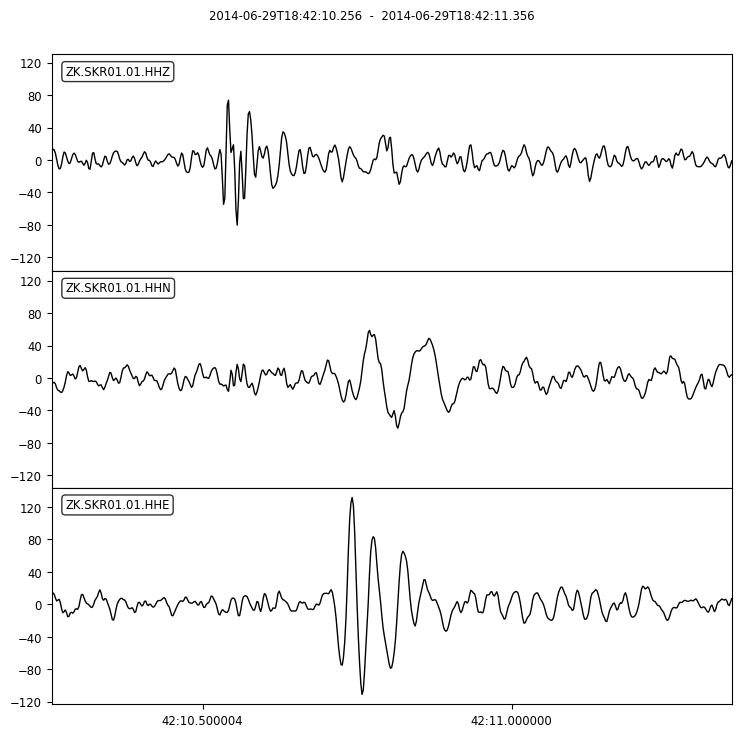

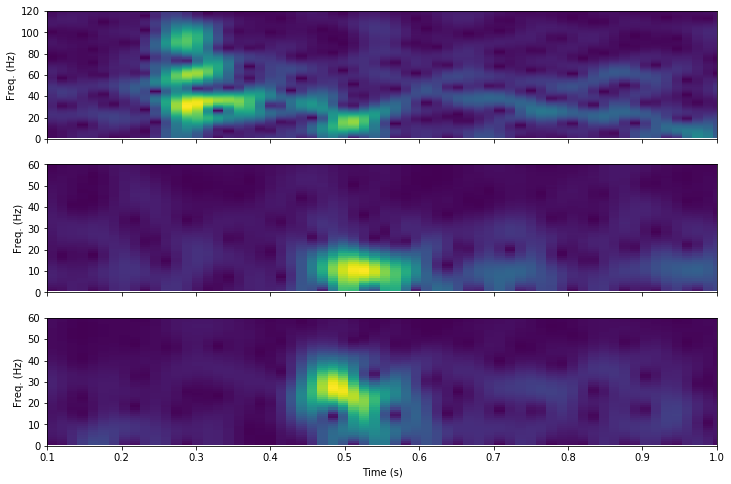

In [22]:
# Plot event:

# Plot waveforms:
st = obspy.read(mseed_fname)
event_arrival_time = UTCDateTime("2014-06-29T18:42:10.356000Z")
st_filt = st.copy()
st_filt.filter("bandpass",freqmin=10.0, freqmax=120.0,corners=4)
st_filt.trim(starttime=event_arrival_time-0.1, endtime=event_arrival_time+1.0).select(station="SKR01").plot()

# Plot spectrogram:
fig, axes = plt.subplots(3, figsize=(12,8), sharex=True)
st.trim(starttime=event_arrival_time-0.1, endtime=event_arrival_time+1.0).select(station="SKR01", component="Z").spectrogram(axes=axes[0], dbscale=False)
st.trim(starttime=event_arrival_time-0.1, endtime=event_arrival_time+1.0).select(station="SKR01", component="N").spectrogram(axes=axes[1], dbscale=False)
st.trim(starttime=event_arrival_time-0.1, endtime=event_arrival_time+1.0).select(station="SKR01", component="E").spectrogram(axes=axes[2], dbscale=False)
axes[0].set_xlim(0.1,1.0)
axes[0].set_ylim(0.0,120.0)
axes[1].set_ylim(0.0,60.0)
axes[2].set_ylim(0.0,60.0)
axes[2].set_xlabel("Time (s)")
axes[0].set_ylabel("Freq. (Hz)")
axes[1].set_ylabel("Freq. (Hz)")
axes[2].set_ylabel("Freq. (Hz)")
plt.show()


Note: The event detected at 2014-06-29T18:42:01 is unlikely to be a real event, as the code has an error where it sometimes detects events for the first second of a given period of data.